In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

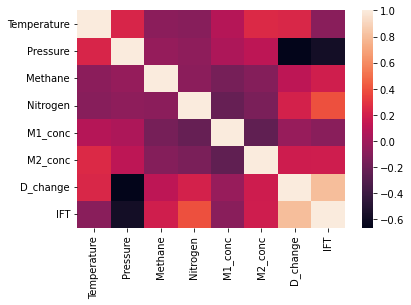

In [3]:
sns.heatmap(df.corr())

# Splitting data and working on features


In [5]:
X= df. drop(['IFT','Phase'],axis=1)

In [6]:
y=df.IFT.astype(float)

In [7]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])

In [8]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X.index=x_cat.index

In [11]:
X=pd.concat([X,x_cat],axis=1)

In [12]:
X

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
X=X.drop(["Salttype"],axis=1)

In [14]:
y.index=X.index

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [77]:
xgbr=XGBRegressor(reg_lambda=0.1)

In [78]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
xgbr.score(X_train,y_train)

0.9996993248960018

In [80]:
xgbr.score(X_test,y_test)

0.9860691443935676

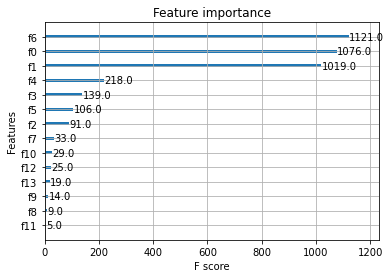

In [81]:
import xgboost as xgb
xgb.plot_importance(xgbr)
plt.show()

In [83]:
importances = xgbr.get_booster().get_score(importance_type='weight')

In [84]:
importances

{'f0': 1076.0,
 'f1': 1019.0,
 'f2': 91.0,
 'f3': 139.0,
 'f4': 218.0,
 'f5': 106.0,
 'f6': 1121.0,
 'f7': 33.0,
 'f8': 9.0,
 'f9': 14.0,
 'f10': 29.0,
 'f11': 5.0,
 'f12': 25.0,
 'f13': 19.0}

# Checking the Mean squared and absolute errors of the XGBR 

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_test,xgbr.predict(X_test))
mean_squared=mean_squared_error(y_test,xgbr.predict(X_test))

mean_abs_t=mean_absolute_error(y_train,xgbr.predict(X_train))
mean_squared_t=mean_squared_error(y_train,xgbr.predict(X_train))

In [87]:
mean_abs, mean_squared, mean_abs_t, mean_squared_t

(0.9947922623832273,
 1.9256163944691997,
 0.14903175847815853,
 0.04046742484090612)

In [92]:
df=pd.DataFrame(y_test) 
df

,IFT
1611,29.52
949,33.50
680,30.50
141,25.00
1620,34.50
...,...
8,27.86
218,56.70
366,43.02
963,62.10


In [93]:
d2=pd.DataFrame(xgbr.predict(X_test), columns=['IFT_pred'])
d2.index=df.index

In [94]:
df=pd.concat([df,d2],axis=1)

In [95]:
df.to_csv("XGBRegressor actual values vs Predicted values without Phase.csv")

# Neural Network

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [153]:
model=Sequential([
    Dense(50, 'relu'),
    Dense(100,'relu',kernel_regularizer=l2(0.1)),
    Dense(200,'relu',kernel_regularizer=l2(0.1)),
    Dense(300,'relu'),
    Dense(400,'relu'),
    Dense(1,'linear')
])

model.compile(optimizer=Adam(0.01),loss='mse', metrics=['mse','mean_absolute_error'])

In [154]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<2.0:
            self.model.stop_training=True

In [155]:
history=model.fit(X_train,y_train,epochs=2000, callbacks=Mycallback())

Epoch 1/2000
39/39 [==============================] - 1s 3ms/step - loss: 259.8783 - mse: 246.1227 - mean_absolute_error: 10.5155
Epoch 2/2000
39/39 [==============================] - 0s 4ms/step - loss: 37.9220 - mse: 26.2866 - mean_absolute_error: 3.9260
Epoch 3/2000
39/39 [==============================] - 0s 4ms/step - loss: 36.4119 - mse: 26.0265 - mean_absolute_error: 3.9483
Epoch 4/2000
39/39 [==============================] - 0s 4ms/step - loss: 30.8218 - mse: 21.3810 - mean_absolute_error: 3.5111
Epoch 5/2000
39/39 [==============================] - 0s 3ms/step - loss: 29.2109 - mse: 20.5354 - mean_absolute_error: 3.3533
Epoch 6/2000
39/39 [==============================] - 0s 3ms/step - loss: 21.2322 - mse: 13.2221 - mean_absolute_error: 2.6665
Epoch 7/2000
39/39 [==============================] - 0s 4ms/step - loss: 19.2611 - mse: 11.8071 - mean_absolute_error: 2.4765
Epoch 8/2000
39/39 [==============================] - 0s 3ms/step - loss: 20.3509 - mse: 13.4593 - mean_abso

39/39 [==============================] - 0s 3ms/step - loss: 7.1657 - mse: 6.2566 - mean_absolute_error: 1.8493
Epoch 66/2000
39/39 [==============================] - 0s 4ms/step - loss: 8.2483 - mse: 7.3528 - mean_absolute_error: 2.0208
Epoch 67/2000
39/39 [==============================] - 0s 4ms/step - loss: 5.9274 - mse: 5.0514 - mean_absolute_error: 1.6558
Epoch 68/2000
39/39 [==============================] - 0s 3ms/step - loss: 5.7682 - mse: 4.8930 - mean_absolute_error: 1.6465
Epoch 69/2000
39/39 [==============================] - 0s 3ms/step - loss: 5.9095 - mse: 5.0432 - mean_absolute_error: 1.6128
Epoch 70/2000
39/39 [==============================] - 0s 3ms/step - loss: 6.5415 - mse: 5.6874 - mean_absolute_error: 1.8076
Epoch 71/2000
39/39 [==============================] - 0s 4ms/step - loss: 6.0007 - mse: 5.1742 - mean_absolute_error: 1.6975
Epoch 72/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.9974 - mse: 4.1583 - mean_absolute_error: 1.5064
Epoch 

39/39 [==============================] - 0s 3ms/step - loss: 4.1919 - mse: 3.6561 - mean_absolute_error: 1.3933
Epoch 130/2000
39/39 [==============================] - 0s 3ms/step - loss: 6.3323 - mse: 5.8059 - mean_absolute_error: 1.7838
Epoch 131/2000
39/39 [==============================] - 0s 3ms/step - loss: 8.4071 - mse: 7.8764 - mean_absolute_error: 2.1346
Epoch 132/2000
39/39 [==============================] - 0s 4ms/step - loss: 5.1450 - mse: 4.5979 - mean_absolute_error: 1.5744
Epoch 133/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.4176 - mse: 3.8833 - mean_absolute_error: 1.4288
Epoch 134/2000
39/39 [==============================] - 0s 5ms/step - loss: 5.6801 - mse: 5.1590 - mean_absolute_error: 1.6649
Epoch 135/2000
39/39 [==============================] - 0s 6ms/step - loss: 4.2833 - mse: 3.7528 - mean_absolute_error: 1.4146
Epoch 136/2000
39/39 [==============================] - 1s 15ms/step - loss: 5.4525 - mse: 4.9250 - mean_absolute_error: 1.614

39/39 [==============================] - 0s 4ms/step - loss: 3.9565 - mse: 3.4912 - mean_absolute_error: 1.3468
Epoch 194/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.4911 - mse: 3.0321 - mean_absolute_error: 1.2569
Epoch 195/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.8459 - mse: 3.3899 - mean_absolute_error: 1.3326
Epoch 196/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.7974 - mse: 3.3400 - mean_absolute_error: 1.3214
Epoch 197/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.5989 - mse: 3.1475 - mean_absolute_error: 1.2830
Epoch 198/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.9543 - mse: 4.5113 - mean_absolute_error: 1.5624
Epoch 199/2000
39/39 [==============================] - 0s 4ms/step - loss: 8.1183 - mse: 7.6795 - mean_absolute_error: 2.0971
Epoch 200/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.3528 - mse: 3.9017 - mean_absolute_error: 1.4598

39/39 [==============================] - 0s 4ms/step - loss: 4.5462 - mse: 4.1175 - mean_absolute_error: 1.4883
Epoch 258/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.1242 - mse: 3.6968 - mean_absolute_error: 1.4036
Epoch 259/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.6026 - mse: 3.1758 - mean_absolute_error: 1.2861
Epoch 260/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.7262 - mse: 3.3000 - mean_absolute_error: 1.3079
Epoch 261/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.3885 - mse: 2.9585 - mean_absolute_error: 1.2254
Epoch 262/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.8379 - mse: 3.4218 - mean_absolute_error: 1.3751
Epoch 263/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.4607 - mse: 3.0376 - mean_absolute_error: 1.2355
Epoch 264/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.9710 - mse: 3.5493 - mean_absolute_error: 1.3720

39/39 [==============================] - 0s 4ms/step - loss: 3.6392 - mse: 3.2320 - mean_absolute_error: 1.3156
Epoch 322/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.4053 - mse: 3.0007 - mean_absolute_error: 1.2257
Epoch 323/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.1403 - mse: 2.7346 - mean_absolute_error: 1.1786
Epoch 324/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.8676 - mse: 3.4672 - mean_absolute_error: 1.3763
Epoch 325/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.5466 - mse: 3.1436 - mean_absolute_error: 1.2910
Epoch 326/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.3164 - mse: 2.9113 - mean_absolute_error: 1.2245
Epoch 327/2000
39/39 [==============================] - 0s 4ms/step - loss: 5.8867 - mse: 5.4858 - mean_absolute_error: 1.7340
Epoch 328/2000
39/39 [==============================] - 0s 4ms/step - loss: 7.2471 - mse: 6.8489 - mean_absolute_error: 2.0191

39/39 [==============================] - 0s 4ms/step - loss: 3.6375 - mse: 3.2483 - mean_absolute_error: 1.3235
Epoch 386/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.1078 - mse: 3.7154 - mean_absolute_error: 1.4356
Epoch 387/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.9619 - mse: 3.5711 - mean_absolute_error: 1.3627
Epoch 388/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2804 - mse: 2.8825 - mean_absolute_error: 1.2282
Epoch 389/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.8711 - mse: 3.4770 - mean_absolute_error: 1.3686
Epoch 390/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.4493 - mse: 3.0602 - mean_absolute_error: 1.2546
Epoch 391/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.9677 - mse: 2.5756 - mean_absolute_error: 1.1138
Epoch 392/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.3699 - mse: 2.9772 - mean_absolute_error: 1.2426

39/39 [==============================] - 0s 4ms/step - loss: 2.9025 - mse: 2.5144 - mean_absolute_error: 1.1200
Epoch 450/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.8394 - mse: 2.4554 - mean_absolute_error: 1.1105
Epoch 451/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.8963 - mse: 2.5075 - mean_absolute_error: 1.1348
Epoch 452/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.9452 - mse: 2.5598 - mean_absolute_error: 1.1104
Epoch 453/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.1847 - mse: 2.8072 - mean_absolute_error: 1.1916
Epoch 454/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2410 - mse: 2.8599 - mean_absolute_error: 1.2155
Epoch 455/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.9764 - mse: 2.5899 - mean_absolute_error: 1.1526
Epoch 456/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.8452 - mse: 3.4586 - mean_absolute_error: 1.3864

39/39 [==============================] - 0s 3ms/step - loss: 3.2029 - mse: 2.8140 - mean_absolute_error: 1.2374
Epoch 514/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8258 - mse: 2.4394 - mean_absolute_error: 1.1245
Epoch 515/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2669 - mse: 2.8800 - mean_absolute_error: 1.2227
Epoch 516/2000
39/39 [==============================] - 0s 9ms/step - loss: 3.6551 - mse: 3.2708 - mean_absolute_error: 1.3533
Epoch 517/2000
39/39 [==============================] - 0s 9ms/step - loss: 3.0106 - mse: 2.6263 - mean_absolute_error: 1.1649
Epoch 518/2000
39/39 [==============================] - 0s 8ms/step - loss: 3.0352 - mse: 2.6483 - mean_absolute_error: 1.1910
Epoch 519/2000
39/39 [==============================] - 0s 5ms/step - loss: 3.9431 - mse: 3.5518 - mean_absolute_error: 1.4020
Epoch 520/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.6375 - mse: 3.2548 - mean_absolute_error: 1.3232

39/39 [==============================] - 0s 3ms/step - loss: 2.4160 - mse: 2.0284 - mean_absolute_error: 1.0057
Epoch 578/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.6571 - mse: 2.2706 - mean_absolute_error: 1.0864
Epoch 579/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.6008 - mse: 2.2157 - mean_absolute_error: 1.0591
Epoch 580/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.4251 - mse: 3.0381 - mean_absolute_error: 1.2483
Epoch 581/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.7087 - mse: 3.3282 - mean_absolute_error: 1.3318
Epoch 582/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8640 - mse: 2.4762 - mean_absolute_error: 1.1269
Epoch 583/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.4192 - mse: 3.0366 - mean_absolute_error: 1.2886
Epoch 584/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.5780 - mse: 3.1947 - mean_absolute_error: 1.2926

39/39 [==============================] - 0s 3ms/step - loss: 3.0684 - mse: 2.6812 - mean_absolute_error: 1.2237
Epoch 642/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.3025 - mse: 2.9161 - mean_absolute_error: 1.2391
Epoch 643/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.3358 - mse: 2.9511 - mean_absolute_error: 1.2462
Epoch 644/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8603 - mse: 2.4610 - mean_absolute_error: 1.1423
Epoch 645/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8874 - mse: 2.4922 - mean_absolute_error: 1.1381
Epoch 646/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.6722 - mse: 2.2782 - mean_absolute_error: 1.1082
Epoch 647/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.5258 - mse: 2.1419 - mean_absolute_error: 1.0306
Epoch 648/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.1430 - mse: 2.7627 - mean_absolute_error: 1.2174

39/39 [==============================] - 0s 6ms/step - loss: 2.8403 - mse: 2.4521 - mean_absolute_error: 1.1586
Epoch 706/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.5836 - mse: 2.1988 - mean_absolute_error: 1.0760
Epoch 707/2000
39/39 [==============================] - 0s 3ms/step - loss: 3.6319 - mse: 3.2536 - mean_absolute_error: 1.3436
Epoch 708/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8929 - mse: 2.5140 - mean_absolute_error: 1.1662
Epoch 709/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8902 - mse: 2.5121 - mean_absolute_error: 1.1751
Epoch 710/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.8126 - mse: 2.4351 - mean_absolute_error: 1.1296
Epoch 711/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.7023 - mse: 2.3240 - mean_absolute_error: 1.1002
Epoch 712/2000
39/39 [==============================] - 0s 3ms/step - loss: 2.5466 - mse: 2.1625 - mean_absolute_error: 1.0362

39/39 [==============================] - 0s 4ms/step - loss: 2.9572 - mse: 2.5766 - mean_absolute_error: 1.1686
Epoch 770/2000
39/39 [==============================] - 0s 4ms/step - loss: 4.2372 - mse: 3.8563 - mean_absolute_error: 1.4221
Epoch 771/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.8400 - mse: 2.4519 - mean_absolute_error: 1.1359
Epoch 772/2000
39/39 [==============================] - 0s 4ms/step - loss: 5.1106 - mse: 4.7252 - mean_absolute_error: 1.6488
Epoch 773/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.1243 - mse: 2.7146 - mean_absolute_error: 1.1923
Epoch 774/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3349 - mse: 1.9327 - mean_absolute_error: 0.9854
Epoch 775/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2725 - mse: 1.8784 - mean_absolute_error: 0.9671
Epoch 776/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.7169 - mse: 2.3239 - mean_absolute_error: 1.1095

39/39 [==============================] - 0s 4ms/step - loss: 2.4902 - mse: 2.1269 - mean_absolute_error: 1.0770
Epoch 834/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.3132 - mse: 1.9501 - mean_absolute_error: 0.9781
Epoch 835/2000
39/39 [==============================] - 0s 5ms/step - loss: 3.5480 - mse: 3.1851 - mean_absolute_error: 1.3416
Epoch 836/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.1608 - mse: 2.8029 - mean_absolute_error: 1.2172
Epoch 837/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6159 - mse: 2.2562 - mean_absolute_error: 1.0947
Epoch 838/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3045 - mse: 1.9374 - mean_absolute_error: 0.9936
Epoch 839/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.8495 - mse: 2.4818 - mean_absolute_error: 1.1246
Epoch 840/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6543 - mse: 2.2849 - mean_absolute_error: 1.0957

39/39 [==============================] - 0s 8ms/step - loss: 2.6064 - mse: 2.2561 - mean_absolute_error: 1.1098
Epoch 898/2000
39/39 [==============================] - 0s 6ms/step - loss: 2.6310 - mse: 2.2669 - mean_absolute_error: 1.0747
Epoch 899/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2908 - mse: 1.9270 - mean_absolute_error: 0.9837
Epoch 900/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.5702 - mse: 2.2109 - mean_absolute_error: 1.0785
Epoch 901/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6600 - mse: 2.3081 - mean_absolute_error: 1.1113
Epoch 902/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.7186 - mse: 2.3605 - mean_absolute_error: 1.1165
Epoch 903/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.4056 - mse: 2.0471 - mean_absolute_error: 1.0295
Epoch 904/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6465 - mse: 2.2873 - mean_absolute_error: 1.1075

39/39 [==============================] - 0s 4ms/step - loss: 2.4013 - mse: 2.0341 - mean_absolute_error: 1.0492
Epoch 962/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2153 - mse: 1.8565 - mean_absolute_error: 0.9902
Epoch 963/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2546 - mse: 1.9008 - mean_absolute_error: 0.9792
Epoch 964/2000
39/39 [==============================] - 0s 7ms/step - loss: 2.5850 - mse: 2.2322 - mean_absolute_error: 1.0826
Epoch 965/2000
39/39 [==============================] - 0s 6ms/step - loss: 2.6426 - mse: 2.2887 - mean_absolute_error: 1.0851
Epoch 966/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3611 - mse: 2.0040 - mean_absolute_error: 1.0116
Epoch 967/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.9990 - mse: 2.6395 - mean_absolute_error: 1.1967
Epoch 968/2000
39/39 [==============================] - 0s 5ms/step - loss: 3.5033 - mse: 3.1478 - mean_absolute_error: 1.3150

39/39 [==============================] - 0s 5ms/step - loss: 2.5181 - mse: 2.1496 - mean_absolute_error: 1.0386
Epoch 1026/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.6661 - mse: 2.2945 - mean_absolute_error: 1.1067
Epoch 1027/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3909 - mse: 2.0287 - mean_absolute_error: 1.0446
Epoch 1028/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.9820 - mse: 2.6274 - mean_absolute_error: 1.1631
Epoch 1029/2000
39/39 [==============================] - 0s 5ms/step - loss: 3.0250 - mse: 2.6580 - mean_absolute_error: 1.2324
Epoch 1030/2000
39/39 [==============================] - 0s 5ms/step - loss: 3.6094 - mse: 3.2379 - mean_absolute_error: 1.3436
Epoch 1031/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.4079 - mse: 2.0363 - mean_absolute_error: 1.0354
Epoch 1032/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.4267 - mse: 2.0473 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 3.0151 - mse: 2.6447 - mean_absolute_error: 1.1994
Epoch 1090/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.3132 - mse: 1.9449 - mean_absolute_error: 0.9958
Epoch 1091/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.3771 - mse: 2.0178 - mean_absolute_error: 1.0209
Epoch 1092/2000
39/39 [==============================] - 0s 6ms/step - loss: 2.3520 - mse: 1.9895 - mean_absolute_error: 0.9997
Epoch 1093/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.1871 - mse: 1.8257 - mean_absolute_error: 0.9559
Epoch 1094/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.0563 - mse: 1.6993 - mean_absolute_error: 0.9137
Epoch 1095/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.1435 - mse: 1.7920 - mean_absolute_error: 0.9356
Epoch 1096/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.6684 - mse: 2.3166 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.6630 - mse: 2.3159 - mean_absolute_error: 1.1024
Epoch 1154/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.6561 - mse: 2.3071 - mean_absolute_error: 1.1167
Epoch 1155/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.9948 - mse: 2.6470 - mean_absolute_error: 1.1804
Epoch 1156/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.7681 - mse: 2.4225 - mean_absolute_error: 1.1412
Epoch 1157/2000
39/39 [==============================] - 0s 6ms/step - loss: 2.8958 - mse: 2.5401 - mean_absolute_error: 1.1770
Epoch 1158/2000
39/39 [==============================] - 0s 6ms/step - loss: 2.8222 - mse: 2.4695 - mean_absolute_error: 1.1638
Epoch 1159/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.4724 - mse: 2.1197 - mean_absolute_error: 1.0460
Epoch 1160/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.4919 - mse: 2.1312 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.4422 - mse: 2.0873 - mean_absolute_error: 1.0378
Epoch 1218/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.0648 - mse: 2.7110 - mean_absolute_error: 1.1984
Epoch 1219/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3056 - mse: 1.9466 - mean_absolute_error: 0.9810
Epoch 1220/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3404 - mse: 1.9710 - mean_absolute_error: 1.0084
Epoch 1221/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3008 - mse: 1.9337 - mean_absolute_error: 0.9963
Epoch 1222/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2654 - mse: 2.8990 - mean_absolute_error: 1.2739
Epoch 1223/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6980 - mse: 2.3315 - mean_absolute_error: 1.1255
Epoch 1224/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.5309 - mse: 2.1642 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.2182 - mse: 1.8673 - mean_absolute_error: 0.9677
Epoch 1282/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.4370 - mse: 2.0820 - mean_absolute_error: 1.0465
Epoch 1283/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3028 - mse: 1.9511 - mean_absolute_error: 1.0150
Epoch 1284/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3770 - mse: 2.0260 - mean_absolute_error: 1.0234
Epoch 1285/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3022 - mse: 1.9512 - mean_absolute_error: 0.9775
Epoch 1286/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.4420 - mse: 2.0803 - mean_absolute_error: 1.0288
Epoch 1287/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.5175 - mse: 2.1574 - mean_absolute_error: 1.0638
Epoch 1288/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3032 - mse: 1.9499 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.1327 - mse: 1.7961 - mean_absolute_error: 0.9338
Epoch 1346/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3123 - mse: 1.9732 - mean_absolute_error: 1.0128
Epoch 1347/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6854 - mse: 2.3412 - mean_absolute_error: 1.1237
Epoch 1348/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2508 - mse: 2.9126 - mean_absolute_error: 1.2866
Epoch 1349/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.7360 - mse: 2.3866 - mean_absolute_error: 1.1422
Epoch 1350/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.6199 - mse: 2.2700 - mean_absolute_error: 1.1044
Epoch 1351/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2322 - mse: 1.8884 - mean_absolute_error: 0.9849
Epoch 1352/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.5491 - mse: 2.2052 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.9166 - mse: 2.5795 - mean_absolute_error: 1.1861
Epoch 1410/2000
39/39 [==============================] - 0s 5ms/step - loss: 2.0339 - mse: 1.6960 - mean_absolute_error: 0.9218
Epoch 1411/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2384 - mse: 1.8963 - mean_absolute_error: 0.9942
Epoch 1412/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.3164 - mse: 1.9769 - mean_absolute_error: 1.0235
Epoch 1413/2000
39/39 [==============================] - 0s 4ms/step - loss: 3.2247 - mse: 2.8837 - mean_absolute_error: 1.2633
Epoch 1414/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.7532 - mse: 2.4100 - mean_absolute_error: 1.1346
Epoch 1415/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.2917 - mse: 1.9447 - mean_absolute_error: 1.0150
Epoch 1416/2000
39/39 [==============================] - 0s 4ms/step - loss: 2.5528 - mse: 2.2076 - mean_absolute_error:

# Looking at Losses vs epochs 

In [156]:
a=pd.DataFrame(history.history)
a

,loss,mse,mean_absolute_error
0,259.878326,246.122726,10.515453
1,37.922031,26.286596,3.926004
2,36.411861,26.026505,3.948322
3,30.821756,21.380962,3.511139
4,29.210896,20.535398,3.353341
...,...,...,...
1430,2.741770,2.394854,1.152812
1431,2.393897,2.039619,1.032411
1432,2.214846,1.857893,0.972884
1433,2.313604,1.960555,1.017892


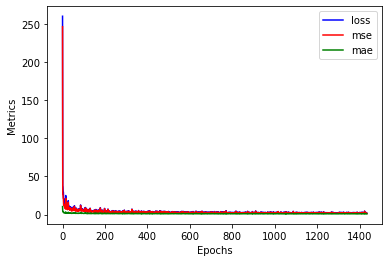

In [157]:
plt.figure()
plt.plot(a.index,a.loss,c='blue',label='loss')
plt.plot(a.index,a.mse, c='r',label='mse')
plt.plot(a.index, a.mean_absolute_error,c='g', label='mae')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

In [158]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

17/17 [==============================] - 0s 2ms/step


0.9836750021357245

In [159]:
r2_score(y_train,model.predict(X_train))

39/39 [==============================] - 0s 2ms/step


0.9862379396798909

In [160]:
ann=pd.DataFrame(y_test)
pred=pd.DataFrame(model.predict(X_test),columns=['IFT ANN model'])

17/17 [==============================] - 0s 2ms/step


In [162]:
ann.index=pred.index
ann=pd.concat([ann,pred],axis=1)
ann.to_csv('ITF_without_phase_new_1.csv')

In [164]:
model.save("IFT_Model_new_no_phase.h5")
